<a href="https://colab.research.google.com/github/Adarshcherukayil/AI-ML/blob/master/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face-recognition

     |████████████████████████████████| 100.2MB 31kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a27e39a7ec4de1efce4a7f61e1be0498afb43f30f1c316fd292ec3a29e39526e
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import cv2
import numpy as np

In [ ]:
img_1 =face_recognition.load_image_file("/content/sample_data/to.jpg")

In [ ]:
face_encoding_1 = face_recognition.face_encodings(img_1)[0]

In [ ]:
face_encoding_1

array([-0.10102384,  0.10202493,  0.03132882, -0.09178106, -0.00929423,
       -0.09916487, -0.04197298, -0.06770329,  0.13241318, -0.067706  ,
        0.20081772, -0.01747995, -0.17751548, -0.0648881 , -0.12617721,
        0.08512378, -0.15994033, -0.14422487, -0.05909852, -0.103413  ,
        0.05472566,  0.0389941 ,  0.05510288,  0.07017276, -0.08399387,
       -0.25771558, -0.06875521, -0.19746977,  0.06457713, -0.10239843,
        0.04203077,  0.02238039, -0.18967545, -0.05616902, -0.02202559,
        0.0248395 ,  0.05875724, -0.04039494,  0.18982553,  0.01222172,
       -0.09424148, -0.01997687,  0.07535858,  0.33602357,  0.1493011 ,
        0.08911183, -0.00774793, -0.03497089,  0.15320835, -0.23176035,
        0.12769111,  0.07158711,  0.07188413,  0.02950491,  0.13855378,
       -0.1401812 ,  0.06757922,  0.05228404, -0.2258155 ,  0.07692   ,
        0.01176673,  0.1080036 , -0.00225466, -0.05411112,  0.18971354,
        0.08119974, -0.07641721, -0.05103299,  0.13263462, -0.21

In [ ]:
known_face_encodings = [face_encoding_1]

In [ ]:
known_face_names = ["Tovino thomas"]

In [ ]:
face_locations = []
face_encodings = []

In [ ]:
test_img =cv2.imread("/content/sample_data/togroup.jpg")

In [ ]:
   rgb_frame = test_img [:, :, ::-1]

In [ ]:
face_locations = face_recognition.face_locations(rgb_frame)

In [ ]:
face_locations

[(150, 356, 305, 201),
 (140, 605, 247, 497),
 (182, 454, 311, 325),
 (2, 491, 46, 448),
 (128, 748, 235, 641),
 (225, 182, 354, 53)]

In [ ]:
 face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

In [ ]:
np.shape(face_encodings)

(6, 128)

In [ ]:
face_names = []
for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

In [ ]:
face_names

['Unknown', 'Tovino thomas', 'Unknown', 'Unknown', 'Unknown', 'Unknown']

In [ ]:
for (top, right, bottom, left), name in zip(face_locations, face_names):
        
        # Draw a box around the face
        cv2.rectangle(test_img, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(test_img, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(test_img, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

In [ ]:
from google.colab.patches import cv2_imshow

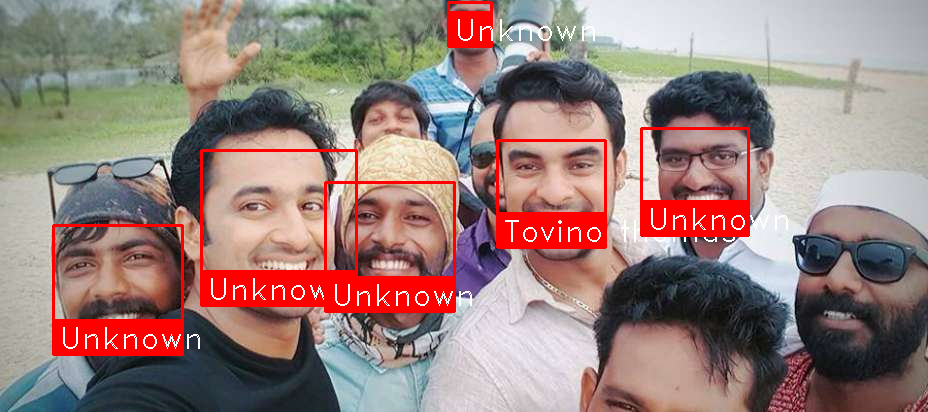

In [ ]:
cv2_imshow(test_img)